In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ramil/Documents/UBA/(75.06) Organización de Datos/TPS/TP1/Entrenamieto_ECI_2020.csv')


# Oportunidades que pasaron por más de una fase

In [3]:
stage = df[['Opportunity_ID', 'Account_Owner', 'Account_Created_Date', 'Stage']]
stage

,Opportunity_ID,Account_Owner,Account_Created_Date,Stage
0,0,Person_Name_51,6/16/2015,Closed Lost
1,1,Person_Name_51,6/16/2015,Closed Won
2,2,Person_Name_64,4/21/2015,Closed Won
3,3,Person_Name_8,7/27/2013,Closed Lost
4,4,Person_Name_8,7/27/2013,Closed Lost
...,...,...,...,...
16942,12801,Person_Name_13,1/15/2016,Closed Won
16943,12801,Person_Name_13,1/15/2016,Closed Won
16944,12801,Person_Name_13,1/15/2016,Closed Won
16945,12802,Person_Name_3,10/20/2015,Closed Lost


In [4]:
etapas_por_oportunidad = stage[['Opportunity_ID', 'Stage']]
etapas_por_oportunidad_ganadas = etapas_por_oportunidad.loc[etapas_por_oportunidad['Stage'] == 'Closed Won']

In [5]:
etapas_por_oportunidad_perdidas = etapas_por_oportunidad.loc[etapas_por_oportunidad['Stage'] == 'Closed Lost']

In [6]:
etapas_por_oportunidad_calificadas = etapas_por_oportunidad.loc[etapas_por_oportunidad['Stage'] == 'Qualification']

In [7]:
etapas_por_oportunidad_propuestas = etapas_por_oportunidad.loc[etapas_por_oportunidad['Stage'] == 'Proposal']

In [8]:
etapas_por_oportunidad_negociadas = etapas_por_oportunidad.loc[etapas_por_oportunidad['Stage'] == 'Negotiation']

# Oportunidades que pasaron por una etapa y resultaron exitosas

In [34]:
etapas_calificadas_y_ganadas = etapas_por_oportunidad_ganadas.merge(etapas_por_oportunidad_calificadas, on = 'Opportunity_ID')
etapas_calificadas_y_ganadas

,Opportunity_ID,Stage_x,Stage_y


In [35]:
etapas_propuestas_y_ganadas = etapas_por_oportunidad_ganadas.merge(etapas_por_oportunidad_propuestas, on = 'Opportunity_ID')
etapas_propuestas_y_ganadas

,Opportunity_ID,Stage_x,Stage_y


In [36]:
etapas_negociadas_y_ganadas = etapas_por_oportunidad_ganadas.merge(etapas_por_oportunidad_negociadas, on = 'Opportunity_ID')
etapas_negociadas_y_ganadas

,Opportunity_ID,Stage_x,Stage_y


# Oportunidades que pasaron por una etapa y resultaron fracasadas

In [37]:
etapas_calificadas_y_perdidas = etapas_por_oportunidad_perdidas.merge(etapas_por_oportunidad_calificadas, on = 'Opportunity_ID')
etapas_calificadas_y_perdidas

,Opportunity_ID,Stage_x,Stage_y


In [38]:
etapas_propuestas_y_perdidas = etapas_por_oportunidad_perdidas.merge(etapas_por_oportunidad_propuestas, on = 'Opportunity_ID')
etapas_propuestas_y_perdidas

,Opportunity_ID,Stage_x,Stage_y


In [39]:
etapas_negociadas_y_perdidas = etapas_por_oportunidad_perdidas.merge(etapas_por_oportunidad_negociadas, on = 'Opportunity_ID')
etapas_negociadas_y_perdidas

,Opportunity_ID,Stage_x,Stage_y


# Oportunidades que pasaron por una etapa 

In [40]:
etapas_calificadas_y_propuestas = etapas_por_oportunidad_propuestas.merge(etapas_por_oportunidad_calificadas, on = 'Opportunity_ID')
etapas_calificadas_y_propuestas

,Opportunity_ID,Stage_x,Stage_y


In [41]:
etapas_propuestas_y_negociadas = etapas_por_oportunidad_propuestas.merge(etapas_por_oportunidad_negociadas, on = 'Opportunity_ID')
etapas_propuestas_y_negociadas

,Opportunity_ID,Stage_x,Stage_y


# Vendedores con etapas cerradas

In [9]:
cantidad_oportunidades_por_vendedor = stage['Account_Owner'].value_counts().to_frame()
cantidad_oportunidades_por_vendedor = cantidad_oportunidades_por_vendedor.reset_index()
cantidad_oportunidades_por_vendedor = cantidad_oportunidades_por_vendedor.rename(columns = {'index' : 'Account_Owner', 'Account_Owner' : 'cant_oportunidades'})

In [10]:
stage = stage.merge(cantidad_oportunidades_por_vendedor, on = 'Account_Owner')
stage

,Opportunity_ID,Account_Owner,Account_Created_Date,Stage,cant_oportunidades
0,0,Person_Name_51,6/16/2015,Closed Lost,108
1,1,Person_Name_51,6/16/2015,Closed Won,108
2,171,Person_Name_51,2/4/2015,Closed Lost,108
3,187,Person_Name_51,6/16/2015,Closed Lost,108
4,188,Person_Name_51,6/16/2015,Closed Won,108
...,...,...,...,...,...
16942,12485,Person_Name_36,6/22/2015,Closed Lost,7
16943,12525,Person_Name_36,8/12/2015,Closed Lost,7
16944,12525,Person_Name_36,8/12/2015,Closed Lost,7
16945,12650,Person_Name_36,9/21/2015,Closed Lost,7


In [26]:
oportunidades_cerradas = stage.loc[(stage['Stage'] != 'Qualification') & (stage['Stage'] != 'Proposal') & (stage['Stage'] != 'Negotiation')]

oportunidades_cerradas = oportunidades_cerradas.loc[oportunidades_cerradas['cant_oportunidades'] > 400]
oportunidades_cerradas

,Opportunity_ID,Account_Owner,Account_Created_Date,Stage,cant_oportunidades
108,2,Person_Name_64,4/21/2015,Closed Won,577
109,7,Person_Name_64,4/21/2015,Closed Won,577
110,245,Person_Name_64,7/27/2013,Closed Won,577
111,262,Person_Name_64,7/27/2013,Closed Won,577
112,265,Person_Name_64,7/27/2013,Closed Won,577
...,...,...,...,...,...
15381,12436,Person_Name_43,7/28/2013,Closed Lost,1241
15382,12437,Person_Name_43,9/19/2014,Closed Lost,1241
15383,12438,Person_Name_43,9/19/2014,Closed Lost,1241
15384,12439,Person_Name_43,9/19/2014,Closed Lost,1241


Text(0, 0.5, 'Cantidad de oportunidades')

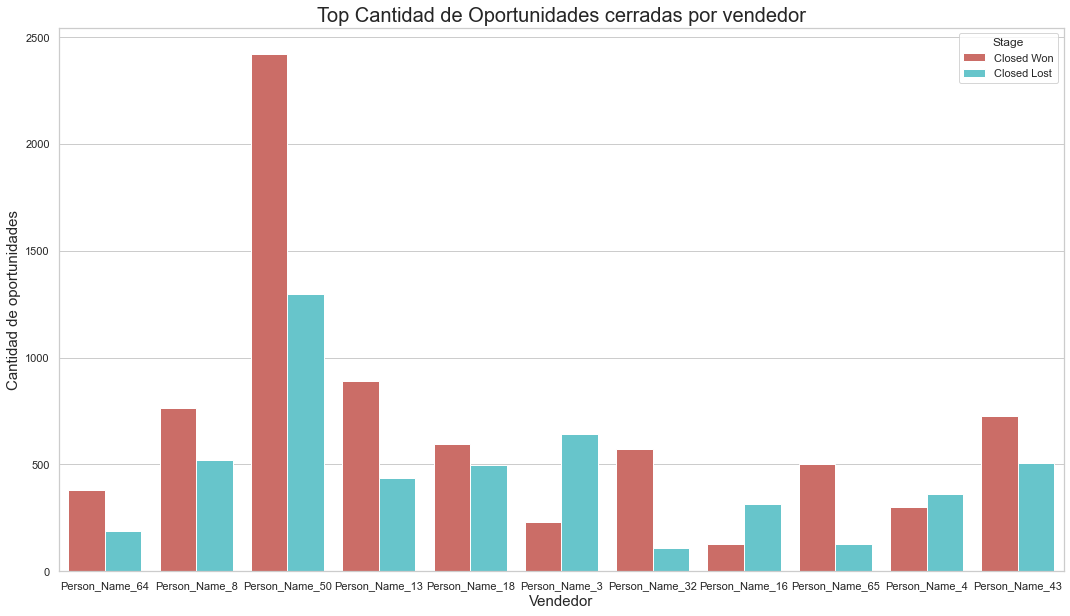

In [32]:
"NO ES FINAL, HABRÁ QUE BUSCAR UN MEJOR FORMATO PARA MOSTRAR ESTOS DATOS"
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (18, 10)

g = sns.countplot(x="Account_Owner", hue="Stage", data=oportunidades_cerradas, palette="hls")
g.set_title("Top Cantidad de Oportunidades cerradas por vendedor", fontsize=20)
g.set_xlabel("Vendedor", fontsize=15)
g.set_ylabel("Cantidad de oportunidades", fontsize=15)

# Vendedores con etapas no cerradas

In [13]:
etapas_no_cerradas = stage.loc[(stage['Stage'] != 'Closed Won') & (stage['Stage'] != 'Closed Lost')]
etapas_no_cerradas

,Opportunity_ID,Account_Owner,Account_Created_Date,Stage,cant_oportunidades
646,11159,Person_Name_64,3/17/2017,Negotiation,577
647,11159,Person_Name_64,3/17/2017,Negotiation,577
648,11162,Person_Name_64,3/17/2017,Negotiation,577
649,11162,Person_Name_64,3/17/2017,Negotiation,577
650,11163,Person_Name_64,3/17/2017,Negotiation,577
...,...,...,...,...,...
16700,10391,Person_Name_55,11/29/2018,Proposal,138
16702,11178,Person_Name_55,7/3/2015,Proposal,138
16820,9232,Person_Name_63,11/17/2016,Proposal,138
16828,10640,Person_Name_63,11/17/2016,Proposal,138


Text(0, 0.5, 'Cantidad de oportunidades')

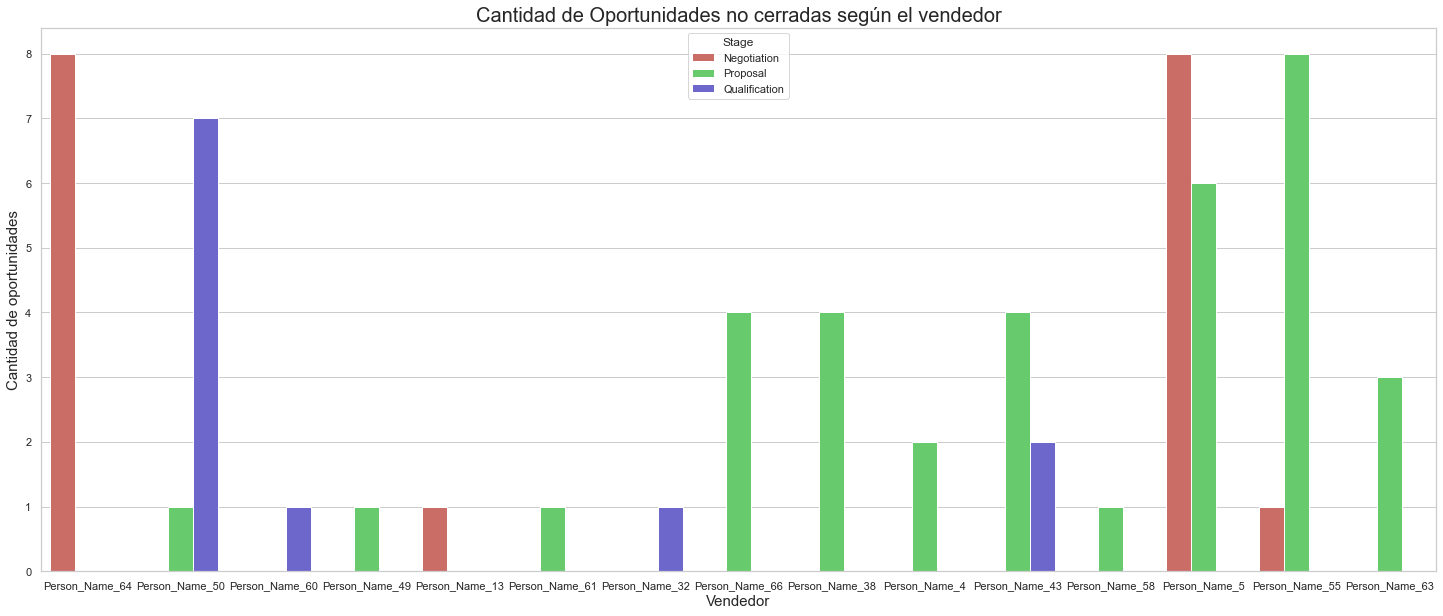

In [37]:
"Agrego estas lineas para setear lineas y tamaño del plot"
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (25, 10)

g = sns.countplot(x="Account_Owner", hue="Stage", data=etapas_no_cerradas, palette="hls")
g.set_title("Cantidad de Oportunidades no cerradas según el vendedor", fontsize=20)
g.set_xlabel("Vendedor", fontsize=15)
g.set_ylabel("Cantidad de oportunidades", fontsize=15)